In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import data_settings as settings
import numpy as np

In [3]:
df_train = pd.read_csv("./data/no1_train.csv")
df_train.describe()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow
count,225088.000000,225088.000000,225088.000000,225088.000000,225088.0,225088.000000,225088.000000,225088.000000,225088.000000
mean,1888.334127,224.189826,21.803497,55.703266,0.0,2190.031963,8.907921,-8.284305,-1999.055081
std,401.000305,58.559855,3.579229,47.053033,0.0,444.077730,320.262539,43.748315,1311.682286
min,683.438000,80.371000,0.000000,0.000000,0.0,849.732000,-1579.680903,-828.000000,-5541.200000
25%,1625.029000,185.017000,22.100000,15.704000,0.0,1916.523000,-142.226700,0.000000,-2996.700000
50%,1933.916000,225.938000,22.100000,41.848000,0.0,2248.874000,-11.282351,0.000000,-1953.700000
75%,2175.595000,269.558000,24.100000,88.723000,0.0,2497.792000,127.454943,0.000000,-906.900000
max,2995.524000,349.271000,25.700000,176.000000,0.0,3351.974000,2956.333317,474.000000,723.400000


# Data preprocessing

### Clamp

In [4]:
from preprocessing import filter_column_based_on_quantile

df_train = filter_column_based_on_quantile(df_train, 0.001, settings.COLUMNS_TO_CLAMP)
df_train.describe()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow
count,224636.000000,224636.000000,224636.000000,224636.000000,224636.0,224636.000000,224636.000000,224636.000000,224636.000000
mean,1888.924507,224.259340,21.801231,55.613476,0.0,2190.599804,7.496014,-8.279254,-2000.194678
std,400.195368,58.478465,3.581429,47.029993,0.0,443.252455,308.588482,43.759360,1311.949926
min,683.438000,80.371000,0.000000,0.000000,0.0,849.732000,-997.412582,-828.000000,-5541.200000
25%,1626.367000,185.091000,22.100000,15.663500,0.0,1917.963000,-141.931476,0.000000,-2998.900000
50%,1934.012000,226.002000,22.100000,41.728000,0.0,2249.096000,-11.282351,0.000000,-1954.500000
75%,2175.595000,269.558000,24.100000,88.490000,0.0,2497.792000,127.095807,0.000000,-907.520000
max,2995.524000,349.271000,25.700000,176.000000,0.0,3351.974000,2243.579521,474.000000,643.600000


### Normalizing (MinMax)

In [5]:
from preprocessing import normalize_columns

df_train = normalize_columns(df_train, settings.COLUMNS_TO_NORMALIZE)
df_train.describe()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow
count,224636.000000,224636.000000,224636.000000,224636.000000,224636.0,224636.000000,224636.000000,224636.000000,224636.000000
mean,0.042770,0.070200,0.696594,-0.368029,0.0,0.071733,-0.379876,0.259172,0.145067
std,0.346177,0.434946,0.278710,0.534432,0.0,0.354284,0.190428,0.067219,0.424250
min,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.184348,-0.221123,0.719844,-0.822006,0.0,-0.146181,-0.472087,0.271889,-0.177888
50%,0.081771,0.083161,0.719844,-0.525818,0.0,0.118488,-0.391464,0.271889,0.159843
75%,0.290745,0.407118,0.875486,0.005568,0.0,0.317267,-0.306072,0.271889,0.498409
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### 5.2.2 Avoiding Structural Imbalances Dataset

KeyboardInterrupt: 

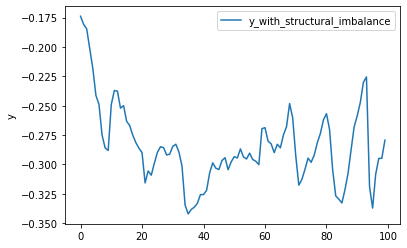

In [6]:
from preprocessing import avoid_structural_imbalance
import seaborn as sns

if settings.AVOID_STRUCTURAL_IMBALANCE:
    sns.lineplot(data=df_train[0:100], x=df_train.index[0:100], y='y', label="y_with_structural_imbalance")
    df_train = avoid_structural_imbalance(df_train)
    sns.lineplot(data=df_train[0:100], x=df_train.index[0:100], y='y', label="y_without_structural_imbalance")

### Add time features

In [7]:
from preprocessing import add_date_time_features

df_train = add_date_time_features(df_train)
df_train

,start_time,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,...,time_of_year_2.0,time_of_year_3.0,time_of_year_4.0,time_of_year_5.0,time_of_year_6.0,time_of_year_7.0,time_of_year_8.0,time_of_year_9.0,time_of_year_10.0,time_of_year_11.0
0,2019-01-09 14:10:00,-0.214215,-0.542157,-0.105058,-0.154227,0.0,-0.224725,-0.169242,0.287250,-0.636593,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-09 14:15:00,-0.214215,-0.542157,-0.105058,-0.154227,0.0,-0.224725,-0.184821,0.287250,-0.636593,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-09 14:20:00,-0.214215,-0.542157,-0.105058,-0.154227,0.0,-0.224725,-0.190162,0.287250,-0.636593,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-09 14:25:00,-0.214215,-0.542157,-0.105058,-0.154227,0.0,-0.224725,-0.204033,0.287250,-0.636593,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-09 14:30:00,-0.214215,-0.542157,-0.105058,-0.154227,0.0,-0.224725,-0.215903,0.287250,-0.636593,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,2021-03-01 03:05:00,0.089101,-0.170621,0.564202,0.209443,0.0,0.132078,-0.280278,0.271889,0.063349,...,1,0,0,0,0,0,0,0,0,0
225084,2021-03-01 03:10:00,0.089101,-0.170621,0.564202,0.209443,0.0,0.132078,-0.293483,0.271889,0.063349,...,1,0,0,0,0,0,0,0,0,0
225085,2021-03-01 03:15:00,0.089101,-0.170621,0.564202,0.209443,0.0,0.132078,-0.320924,0.271889,0.063349,...,1,0,0,0,0,0,0,0,0,0
225086,2021-03-01 03:20:00,0.089101,-0.170621,0.564202,0.209443,0.0,0.132078,-0.323621,0.271889,0.063349,...,1,0,0,0,0,0,0,0,0,0


### Lag features

In [8]:
# Previous y lag feature
df_train["y_prev"] = df_train["y"].shift(1)

# Add power imbalance from 24 hours ago
df_train["y_prev_24h"] = df_train["y"].shift(24*60//5)

# Mean power imbalance yesterday
df_train = pd.merge_asof(
    df_train,
    df_train.resample('D', on="start_time")["y"].mean().shift(1),
    right_index=True,
    left_on="start_time",
)
df_train = df_train.rename(columns={"y_x": "y", "y_y": "y_yesterday"})

df_train.describe()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,time_of_day_0,...,time_of_year_5.0,time_of_year_6.0,time_of_year_7.0,time_of_year_8.0,time_of_year_9.0,time_of_year_10.0,time_of_year_11.0,y_prev,y_prev_24h,y_yesterday
count,224636.000000,224636.000000,224636.000000,224636.000000,224636.0,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,...,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224635.000000,224348.000000,224518.000000
mean,0.042770,0.070200,0.696594,-0.368029,0.0,0.071733,-0.379876,0.259172,0.145067,0.041627,...,0.076715,0.079489,0.079395,0.076301,0.079195,0.076867,0.079489,-0.379876,-0.380058,-0.379456
std,0.346177,0.434946,0.278710,0.534432,0.0,0.354284,0.190982,0.067219,0.424250,0.199737,...,0.266140,0.270500,0.270355,0.265480,0.270043,0.266380,0.270500,0.190982,0.191004,0.166177
min,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.016927,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.016927,-1.016927,-0.846296
25%,-0.184348,-0.221123,0.719844,-0.822006,0.0,-0.146181,-0.472751,0.271889,-0.177888,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.472751,-0.472898,-0.455197
50%,0.081771,0.083161,0.719844,-0.525818,0.0,0.118488,-0.391598,0.271889,0.159843,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.391599,-0.391786,-0.391600
75%,0.290745,0.407118,0.875486,0.005568,0.0,0.317267,-0.305042,0.271889,0.498409,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.305042,-0.305283,-0.317235
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.011390,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.011390,1.011390,0.790457


In [9]:
# Drop the NAs
df_train = df_train.dropna()
df_train.describe()


,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,time_of_day_0,...,time_of_year_5.0,time_of_year_6.0,time_of_year_7.0,time_of_year_8.0,time_of_year_9.0,time_of_year_10.0,time_of_year_11.0,y_prev,y_prev_24h,y_yesterday
count,224348.000000,224348.000000,224348.000000,224348.000000,224348.0,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,...,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000
mean,0.042992,0.071002,0.697623,-0.367801,0.0,0.072051,-0.380057,0.259161,0.145944,0.041627,...,0.076814,0.079591,0.079497,0.076399,0.079296,0.076965,0.079591,-0.380056,-0.380058,-0.379532
std,0.346206,0.434648,0.277404,0.534680,0.0,0.354278,0.191025,0.067237,0.423798,0.199736,...,0.266296,0.270659,0.270514,0.265636,0.270201,0.266537,0.270659,0.191026,0.191004,0.166217
min,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.016927,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.016927,-1.016927,-0.846296
25%,-0.183943,-0.220052,0.719844,-0.822188,0.0,-0.145358,-0.472898,0.271889,-0.176368,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.472898,-0.472898,-0.455197
50%,0.082112,0.084061,0.719844,-0.525818,0.0,0.118713,-0.391804,0.271889,0.160739,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.391804,-0.391786,-0.391600
75%,0.291204,0.407772,0.875486,0.006750,0.0,0.317651,-0.305381,0.271889,0.498849,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.305379,-0.305283,-0.317235
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.011390,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.011390,1.011390,0.790457


### Drop columns we don't want to use

In [10]:
df_train = df_train.drop(columns=settings.COLUMNS_TO_DROP)
df_train

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day_0,time_of_day_1,...,time_of_year_5.0,time_of_year_6.0,time_of_year_7.0,time_of_year_8.0,time_of_year_9.0,time_of_year_10.0,time_of_year_11.0,y_prev,y_prev_24h,y_yesterday
288,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.150024,0.271889,-0.578062,0,0,...,0,0,0,0,0,0,0,-0.147959,-0.169242,-0.278984
289,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.155051,0.271889,-0.578062,0,0,...,0,0,0,0,0,0,0,-0.150024,-0.184821,-0.278984
290,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.158408,0.271889,-0.578062,0,0,...,0,0,0,0,0,0,0,-0.155051,-0.190162,-0.278984
291,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.176242,0.271889,-0.578062,0,0,...,0,0,0,0,0,0,0,-0.158408,-0.204033,-0.278984
292,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.184980,0.271889,-0.578062,0,0,...,0,0,0,0,0,0,0,-0.176242,-0.215903,-0.278984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,0.089101,-0.170621,0.564202,0.209443,0.132078,-0.280278,0.271889,0.063349,0,0,...,0,0,0,0,0,0,0,-0.282353,-0.348646,-0.233974
225084,0.089101,-0.170621,0.564202,0.209443,0.132078,-0.293483,0.271889,0.063349,0,0,...,0,0,0,0,0,0,0,-0.280278,-0.338780,-0.233974
225085,0.089101,-0.170621,0.564202,0.209443,0.132078,-0.320924,0.271889,0.063349,0,0,...,0,0,0,0,0,0,0,-0.293483,-0.344519,-0.233974
225086,0.089101,-0.170621,0.564202,0.209443,0.132078,-0.323621,0.271889,0.063349,0,0,...,0,0,0,0,0,0,0,-0.320924,-0.346010,-0.233974


Move y_prev to the last column, this will be useful later.

In [11]:
df_train = df_train[[c for c in df_train if c not in ['y_prev']] 
       + ['y_prev']]
df_train.describe()

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day_0,time_of_day_1,...,time_of_year_5.0,time_of_year_6.0,time_of_year_7.0,time_of_year_8.0,time_of_year_9.0,time_of_year_10.0,time_of_year_11.0,y_prev_24h,y_yesterday,y_prev
count,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,...,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000
mean,0.042992,0.071002,0.697623,-0.367801,0.072051,-0.380057,0.259161,0.145944,0.041627,0.041569,...,0.076814,0.079591,0.079497,0.076399,0.079296,0.076965,0.079591,-0.380058,-0.379532,-0.380056
std,0.346206,0.434648,0.277404,0.534680,0.354278,0.191025,0.067237,0.423798,0.199736,0.199603,...,0.266296,0.270659,0.270514,0.265636,0.270201,0.266537,0.270659,0.191004,0.166217,0.191026
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.016927,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.016927,-0.846296,-1.016927
25%,-0.183943,-0.220052,0.719844,-0.822188,-0.145358,-0.472898,0.271889,-0.176368,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.472898,-0.455197,-0.472898
50%,0.082112,0.084061,0.719844,-0.525818,0.118713,-0.391804,0.271889,0.160739,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.391786,-0.391600,-0.391804
75%,0.291204,0.407772,0.875486,0.006750,0.317651,-0.305381,0.271889,0.498849,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.305283,-0.317235,-0.305379
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.011390,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.011390,0.790457,1.011390


### Add Gaussian Noise to y_prev

In [12]:
df_train['y_prev'] = df_train['y_prev'] + np.random.normal(0, 0.1, df_train['y_prev'].shape)
df_train.describe()

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day_0,time_of_day_1,...,time_of_year_5.0,time_of_year_6.0,time_of_year_7.0,time_of_year_8.0,time_of_year_9.0,time_of_year_10.0,time_of_year_11.0,y_prev_24h,y_yesterday,y_prev
count,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,...,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000
mean,0.042992,0.071002,0.697623,-0.367801,0.072051,-0.380057,0.259161,0.145944,0.041627,0.041569,...,0.076814,0.079591,0.079497,0.076399,0.079296,0.076965,0.079591,-0.380058,-0.379532,-0.380435
std,0.346206,0.434648,0.277404,0.534680,0.354278,0.191025,0.067237,0.423798,0.199736,0.199603,...,0.266296,0.270659,0.270514,0.265636,0.270201,0.266537,0.270659,0.191004,0.166217,0.215696
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.016927,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.016927,-0.846296,-1.272806
25%,-0.183943,-0.220052,0.719844,-0.822188,-0.145358,-0.472898,0.271889,-0.176368,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.472898,-0.455197,-0.504058
50%,0.082112,0.084061,0.719844,-0.525818,0.118713,-0.391804,0.271889,0.160739,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.391786,-0.391600,-0.390855
75%,0.291204,0.407772,0.875486,0.006750,0.317651,-0.305381,0.271889,0.498849,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.305283,-0.317235,-0.273782
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.011390,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.011390,0.790457,1.271655


### Save to .csv

In [13]:
df_train.to_csv("./data/train_dataset_522.csv", index=False)